### Regression exercise

Today, we will fit different polynomial regression to randomly generated data and explore how our loss function behaves. We will use the formulas, introduced in the theoretical sections and create a linear regression model from scratch. 


In [1]:
import numpy as np

#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

In [40]:
def psi(x,m):
    return np.asarray([x**i for i in range(m + 1)])

In [41]:
psi(3, 2)

array([1, 3, 9])

#### Task 2

Write a function $h(x,\alpha)$ defined as $h(x,\alpha)=\alpha^T\psi(x)$

multiplying weights to data and predicting output

In [42]:
def h(x,a,m):
    return a.T.dot(psi(x, m))

In [45]:
h(3, np.array([1,2,3]), 2)

34

#### Task 3
Create a random 3rd order polynomial (we call it p3)

In [9]:
p3 = np.poly1d([1,-7,2,0])

In [11]:
#p3(xs)

#### Task 4
Choose an interval [a,b], on which the polynomial is S-shaped.

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

In [12]:
xs = np.random.random_sample(30)*8
xs

array([6.25198055, 4.06952988, 1.14793373, 6.84938603, 1.31776725,
       6.53105901, 0.56024133, 2.89612509, 5.83009596, 2.35289809,
       5.0955173 , 0.36450142, 6.19057223, 2.97045418, 7.99984112,
       3.0718095 , 3.81737751, 3.47920034, 2.89371939, 4.42363192,
       3.07948546, 6.91675495, 7.9592988 , 3.92202833, 3.80021674,
       0.105947  , 0.8469967 , 4.87723078, 1.44618212, 6.783323  ])

In [13]:
psi(xs,3)

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [6.25198055e+00, 4.06952988e+00, 1.14793373e+00, 6.84938603e+00,
        1.31776725e+00, 6.53105901e+00, 5.60241326e-01, 2.89612509e+00,
        5.83009596e+00, 2.35289809e+00, 5.09551730e+00, 3.64501425e-01,
        6.19057223e+00, 2.97045418e+00, 7.99984112e+00, 3.07180950e+00,
        3.81737751e+00, 3.47920034e+00, 2.89371939e+00, 4.42363192e+00,
        3.07948546e+00, 6.91675495e+00, 7.95929880e+00, 3.92202833e+00,
        3.80021674e+00,

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

In [14]:
ys = p3(xs)

In [15]:
ys

array([-16.73407032, -40.39267113,  -5.41570366,   6.6328549 ,
        -7.23172252,  -6.94043413,  -0.90076662, -28.62916702,
       -28.10486859, -21.02116144, -39.25751905,  -0.15259804,
       -18.63870545, -29.61418424,  79.98697209, -30.92283994,
       -38.74360085, -35.66029829, -28.5969614 , -41.56844482,
       -31.02017292,   9.85094199,  76.69059613, -39.50224609,
       -38.60970772,   0.13450986,  -2.72019213, -40.7406567 ,
        -8.72312772,   3.59658538])

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

In [16]:
from matplotlib import pyplot

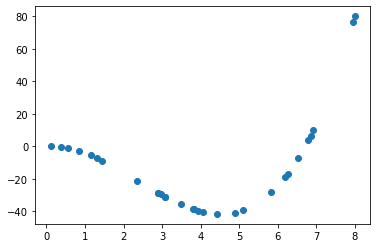

In [17]:
pyplot.scatter(xs, ys);

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi, create the matrix X defined as 

<img src="matrixX.png">

In [18]:
#xs = np.random.random_sample(30) * 8
#xs

In [48]:
def create_x(m):
    X = np.zeros((m+1, len(xs)))
    for i in range(len(xs)):
        X[:,i] = psi(xs[i], m)
    return X

In [20]:
X = create_x()

In [21]:
X

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [6.25198055e+00, 4.06952988e+00, 1.14793373e+00, 6.84938603e+00,
        1.31776725e+00, 6.53105901e+00, 5.60241326e-01, 2.89612509e+00,
        5.83009596e+00, 2.35289809e+00, 5.09551730e+00, 3.64501425e-01,
        6.19057223e+00, 2.97045418e+00, 7.99984112e+00, 3.07180950e+00,
        3.81737751e+00, 3.47920034e+00, 2.89371939e+00, 4.42363192e+00,
        3.07948546e+00, 6.91675495e+00, 7.95929880e+00, 3.92202833e+00,
        3.80021674e+00,

#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6.

In [22]:
def compute_alpha(X, ys):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X, X.T)), X), ys)
    

In [23]:
alpha = compute_alpha(X, ys)

#### Task 10
Plot the data and the computed polynomial. Does it fit?

In [24]:
y2 = []
for i in range(len(xs)):
    y2.append(h(xs[i], alpha))
    
y2
    

[-4.543763233125048,
 -39.17647325883179,
 -10.927067033574692,
 13.245552800978544,
 -14.907540814379388,
 3.3220319245036762,
 5.074476863765319,
 -38.09440253386415,
 -14.954882303488205,
 -32.92762836323094,
 -28.832049895189044,
 11.171310067940418,
 -6.16993390858741,
 -38.571695220241565,
 57.564505012288635,
 -39.13343825727711,
 -40.106231261358346,
 -40.35431674167151,
 -38.07803102868355,
 -36.79667527986983,
 -39.171793371733266,
 15.475719838450061,
 55.7775464323808,
 -39.79758793364985,
 -40.14638384210082,
 19.812371855991337,
 -3.1650028669568173,
 -31.915064628151967,
 -17.725634383151025,
 11.102720934120839]

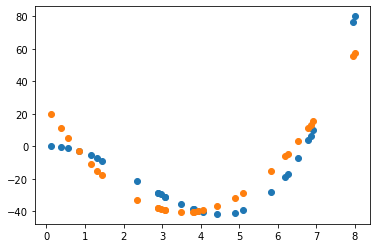

In [26]:
pyplot.scatter(xs, ys)
pyplot.scatter(xs, y2)

pyplot.show()

#### Task 11
Repeat the process for m=3,…,10. What do you observe?

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. y is our `ys` from the Task 6. What do you observe? Could you tell the optimal m from the plot?

In [33]:
def compute_loss(predy, y):
    return ((predy - y)**2).sum()

In [46]:
def find_loss(alpha, m):
    y2 = []
    for i in range(len(xs)):
        y2.append(h(xs[i], alpha, m))
    loss = compute_loss(y2, ys)
    return loss

In [ ]:
find_loss()

In [35]:
compute_loss(y2, ys)

3148.3485632313327

In [50]:
sums = []
ms = range(2,11)
for m in ms:
    #sums.append((np.dot(alpha.T, xs) - ys)**2)
    X = create_x(m)
    alpha = compute_alpha(X, ys)
    sums.append(find_loss(alpha, m))
    
#sum(sums)

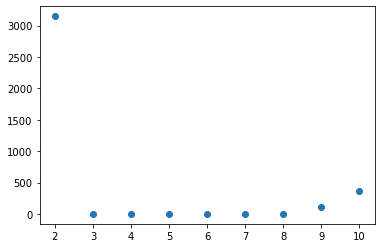

In [51]:
pyplot.scatter(ms,sums);

In [30]:
alpha.T

array([ 23.54641441, -35.77453913,   5.00345998])

In [32]:
np.dot(alpha.T, xs)

ValueError: shapes (3,) and (30,) not aligned: 3 (dim 0) != 30 (dim 0)

In [31]:
ys

array([-16.73407032, -40.39267113,  -5.41570366,   6.6328549 ,
        -7.23172252,  -6.94043413,  -0.90076662, -28.62916702,
       -28.10486859, -21.02116144, -39.25751905,  -0.15259804,
       -18.63870545, -29.61418424,  79.98697209, -30.92283994,
       -38.74360085, -35.66029829, -28.5969614 , -41.56844482,
       -31.02017292,   9.85094199,  76.69059613, -39.50224609,
       -38.60970772,   0.13450986,  -2.72019213, -40.7406567 ,
        -8.72312772,   3.59658538])